In [13]:
import numpy as np
import matplotlib.pyplot as plt

from createData import createData
from feedforward import FeedForwardNN, BCELoss

# This pipeline is a showcase of the feedforward neural network I implemented from scratch in the feedforward.py file

(150, 2)
[0.39875201 0.75661588]


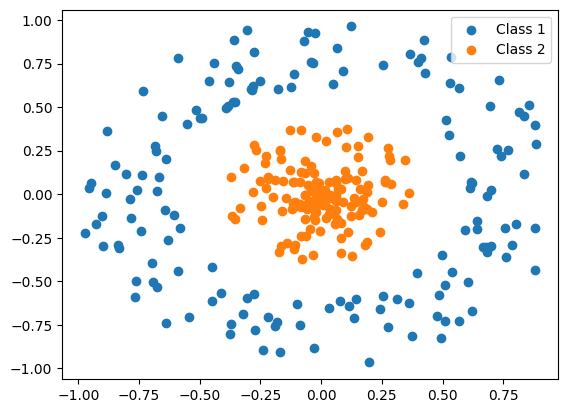

In [14]:
class1, class2 = createData(150, 150)
print(class1.shape)
print(class1[0])
plt.scatter(class1[:,0], class1[:,1], label="Class 1")
plt.scatter(class2[:,0], class2[:,1], label="Class 2")
plt.legend(loc="upper right")
plt.show()

### Create neural network

In [15]:
nn = FeedForwardNN(input_size = 2, output_size = 1, nr_layers = 3, hidden_units = [10, 10, 10], activation = "sigmoid", output_activation = "sigmoid")
weights = nn.weights()
for i in range(len(weights)):
    print(weights[i].shape)
    print(weights[i])

(10, 2)
[[-0.27985127 -0.02326411]
 [ 0.05738269  0.12671166]
 [ 0.12113302 -0.31152669]
 [-0.36477934 -0.24674888]
 [ 0.23536307  0.39396901]
 [ 0.31961943  0.22383011]
 [-0.41281681 -0.36768515]
 [ 0.57027721  0.58509458]
 [-0.05016018  0.14784289]
 [ 0.53054555 -0.66537562]]
(10, 10)
[[ 0.09410551  0.08521336  0.21110562 -0.2418152   0.08722391  0.301908
   0.24109072 -0.08547482 -0.15704315 -0.21037855]
 [ 0.19174521 -0.05409654  0.20115637  0.08216964 -0.15436774 -0.07811757
   0.03737544 -0.20787852  0.26303456 -0.28209854]
 [-0.0544134   0.06179624  0.12790093 -0.27298086  0.1819008   0.08028418
   0.29223204  0.22601181  0.16510239  0.3004728 ]
 [-0.04623366  0.10409044 -0.04416757 -0.23385206  0.17071466  0.26421127
   0.09491957  0.26293281 -0.00988814 -0.22672423]
 [-0.24763477 -0.18454602  0.30562874 -0.11933288 -0.05238936 -0.18872809
   0.17926387 -0.10848784  0.17000358 -0.03209058]
 [ 0.00303032 -0.23450585 -0.0782755  -0.25537021 -0.06105107 -0.31506586
  -0.28176714  

### Quick forward call

In [16]:
input = class1[0]
output = nn.forward(input)
print(output)
loss = BCELoss(output[0], 1)
print(loss)

[0.49622416364605126]
0.7007275115178321


### Train network on the two classes

In [17]:
nr_epochs = 200
learning_rate = 0.001
running_loss = 0
loss = []
for epoch in range(nr_epochs):
    # class1
    target = 0
    for i in range(class1.shape[0]):
        # class1
        output = nn.forward(class1[i])[0]
        current_loss = BCELoss(output, target)
        running_loss += current_loss
        # loss.append(current_loss)
        nn.backprop(class1[i], output, 0, "BCELoss", learning_rate)
        
        # class2
        output = nn.forward(class2[i])[0]
        current_loss = BCELoss(output, target)
        running_loss += current_loss
        # loss.append(current_loss)
        nn.backprop(class2[i], output, 1, "BCELoss", learning_rate)

        
        # if (i+1 % 10 == 0):
            # loss.append(running_loss / 20)
            # running_loss = 0
            # print(loss[-1])
    loss.append(running_loss/(class1.shape[0] * 2))
    running_loss = 0
    # # class2
    # target = 1
    # for i in range(class2.shape[0]):
    #     output = nn.forward(class2[i])[0]
    #     loss.append(BCELoss(output, target))
    #     nn.backprop(class2[i], output, target, "BCELoss", learning_rate)

    
    

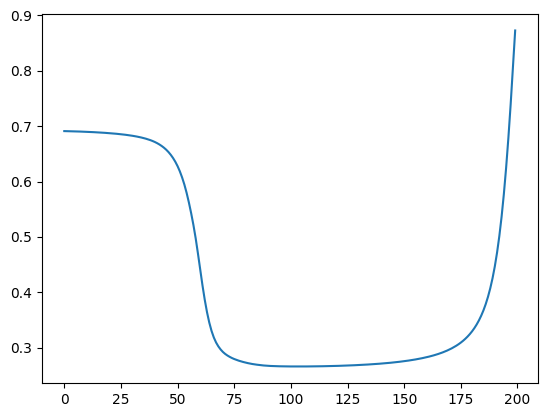

In [18]:
plt.plot(loss)
plt.show()